## Extracted HOG features trained on a Linear SVM.
The HOG features from the image dataset were extracted and those features were trained using a Linear SVM claasifier. A **53%** accuracy was reached.

In [0]:
%tensorflow_version 1.x
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2

Loading Dataset

In [28]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()   #loading the data
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)  #shapes of test and train

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [29]:
categorical_y_train = to_categorical(y_train)
len(categorical_y_train[0])   # number of classes

10

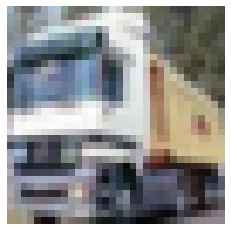

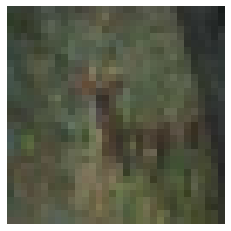

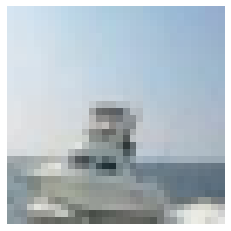

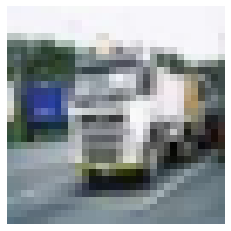

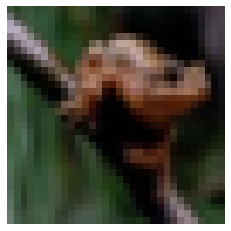

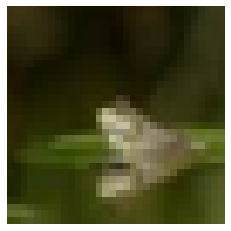

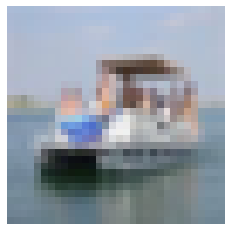

In [30]:
plt.imshow(X_train[1],interpolation="none")
plt.axis('off')
plt.show()
plt.imshow(X_train[10])
plt.axis('off')
plt.show()
plt.imshow(X_train[100])
plt.axis('off')
plt.show()
plt.imshow(X_train[1000])
plt.axis('off')
plt.show()
plt.imshow(X_train[5000])
plt.axis('off')
plt.show()
plt.imshow(X_train[25000])
plt.axis('off')
plt.show()
plt.imshow(X_train[49000])
plt.axis('off')
plt.show()


In [0]:
from skimage.feature import hog
def Get_hog_features(matrix):
  """
  matrix : image dataset from which the HOG features are to be extracted.
  hog_features: A numpy array o=is returned which contains the HOG features of the image dataset.
  """
  hog_features =[]
  for img in matrix:
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    hog_features.append(fd)
  hog_features = np.asarray(hog_features)  
  return hog_features  


In [0]:
x_train_hog = Get_hog_features(X_train)
x_test_hog = Get_hog_features(X_test)

In [34]:
from sklearn.svm import LinearSVC
y = np.ravel(y_train)
y_ = np.ravel(y_test)
clf = LinearSVC()
clf.fit(x_train_hog, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [35]:
clf.score(x_test_hog,y_test)

0.536